**TO DO**

- Improve answer What was the Box Office and Budget?
- Add missing songs


# Introduction

`Web scraping` is a valuable skill for a data scientist. It allows retrieving and parsing data stored on web pages across the Internet. 

Data may be not available through datasets or APIs, therefore web scraping might be the only way to obtain the data needed to answer our questions. Furthermore, web scraping give us the opportunity to acquire additional data that might give that extra boorst to our model. 

In a `business point of view`, web scraping help us making informed business decision. It provide us an opportunity to:

* Know better your competitors, their prices, services
* Know your customers, their behavior, their needs, what they think of your product(s)/service(s),
* Keep well informed about your partners,
* Gather public opinion about your company in general, as well as yours or similar product(s)/service(s),
* Obtain contact or other information of potential clients via social media and forums, so meaningfully resources can be directed towards this group of possible customers.

and the list goes on....

Also for `public/govermental organizations` web scraping can be very helpful. It might help gathering information from websites of different cities within an region about an important subject such as health, security, or environment. This data that sometimes are not easily collected across city agencies might be published by them on line. Therefore, this gives an opportunity to collect and analyze the data in order to extract beneficial insights to society.

In addition, data can be used for personal needs and also for fun! For instances, it can help you find your new home, a new recipe, or information about your favorite subject, artist, movie, music.... again your imagination is the limit.

Once you have your data, it is time to analyze and manipulate it using tools such as `pandas` and `numpy`.

Here, to illustrate the use of web scraping we make use of a subject that probably will please everybody (or the great majority): Movies and Music! On top of it we will pay our respect to the first Jams Bond, [Sir Thomas Sean Connery](https://www.imdb.com/name/nm0000125/bio) that left us October 31, 2020.

Basically the following steps are taken:

📽️ Extract information about all the movies from James Bond in a table at [List_of_James_Bond_films](https://en.wikipedia.org/wiki/List_of_James_Bond_films)

🎶 Extract information about all the James Bond's theme songs in a table at [Lijst_van_titelsongs_uit_de_James_Bondfilms](https://nl.wikipedia.org/wiki/Lijst_van_titelsongs_uit_de_James_Bondfilms) 
("Yes! Dutch site the structure of the table was much easier. So if you have an option go to the easy one  😉 ")

🎶 Scrape all lyrics of the theme songs that are not instrumental

For this we use basic knowledge of `HTML` which means its tree structure and that tags define the branches where the information we search are.

We make use of two Python libraries:

* [`requests`](https://requests.readthedocs.io/en/master/) which we allow us to get the webpage we want; and 
* [`Beautiful Soup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) that parses the content of the webpage and allows us extracting tags from an HTML document.

So let's start!

# 📽️Web Scraping Information about James Bond's Movies

## Step 1: Inspecting the website

Every time we scrape a website we need to have an idea of its structure and where to find what we need.

For this, no matter which browser we use, we can access its code by right clicking and choosing to access it source code, i.e., `view page` (Firefox) or `view page source` (Chrome and Microsoft Edge). If you need details of an specific element right click on it and choose `inspect element`(Firefox) or `inspect` (Chrome and Microsoft Edge).

Web pages use `HyperText Markup Language (HTML)` which is a markup language with its own syntax and rules. When a Web browser like Chrome or Firefox downloads a Web page, it reads the HTML to determine how to render it and display it to you.

HTML consists of **tags**. Anything in between the opening and closing of a tag is the content of that tag. 

Some of elements that often encountered are:

`<head>` : Contains metadata useful to the Web browser that's rendering the page and it is not visible to the user.

`<body>` : Contains represents the content of an HTML document with which the user interacts.

`<div>`: Section of the body.

`<p>`: Used for paragraphs. 

`a` : Creates a hyperlink to web pages, files, email addresses, locations in the same page, or anything else a URL can address.

For more definitions of elements check these links: [dev_mozilla](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) and [w3s](https://www.w3schools.com/html/html_elements.asp)

While inspecting the website source code you will notice that Some tags contain attributes which provide special instructions for the contents contained with that tag. Specific html attributes names are followed by equal sign, followed by information which being passed to that attribute within that tag.

For example:

`<div id="contentSub"></div>`

<img src="../images/webpage_code_ex01.JPG">

![](../images/webpage_code_ex01.JPG)

## Step 2: Access Content of Website

For this we need to :

1. Access website using `requests`
2. Parse content with `Beautiful Soup` so we can extract what we need within tags

In [9]:
# importing packages

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
# start making request to our chose website

main_url = "https://en.wikipedia.org/wiki/List_of_James_Bond_films"

# Send request and catch response: r

response = requests.get(main_url)

# get the content of the response

content = response.content

# parse webpage
parser = BeautifulSoup(content, 'html.parser')

The parse is a BeautifulSoup object, which represents the document as a nested data structure.

In [11]:
parser

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of James Bond films - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"23af578f-6859-4097-865c-1612b0980b6f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_James_Bond_films","wgTitle":"List of James Bond films","wgCurRevisionId":988956413,"wgRevisionId":988956413,"wgArticleId":33190861,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from June 2020","EngvarB from June 2020","CS1 mai

We will need to perform the same process for our 2 next tasks, so let's build a function:

In [13]:
def parse_website(url):
    """ 
    Parse content of a website
    
    Args:
        url (str): url of the website of which we want to acess the content 
        
    Return:
        parser: representation of the document as a nested data structure.
    """
    
    # Send request and catch response
    response = requests.get(main_url)

    # get the content of the response
    content = response.content

    # parse webpage
    parser = BeautifulSoup(content, 'html.parser')
    
    return parser
    

## Extracting What We Need

This part will depend on the structure of the website source code and of what you need as information from it.

In [5]:
# start making request to our chose website

main_url = "https://nl.wikipedia.org/wiki/Lijst_van_titelsongs_uit_de_James_Bondfilms"
# Send request and catch response: r

response = requests.get(main_url)
response

<Response [200]>

In [6]:
content = response.content
content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="nl" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Lijst van titelsongs uit de James Bondfilms - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.",".\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","januari","februari","maart","april","mei","juni","juli","augustus","september","oktober","november","december"],"wgRequestId":"1ea153c8-8ff6-4d21-b41f-8f1c7258c3c0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Lijst_van_titelsongs_uit_de_James_Bondfilms","wgTitle":"Lijst van titelsongs uit de James Bondfilms","wgCurRevisionId":56107008,"wgRevisionId":56107008,"wgArticleId":701466,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["James Bond"],"wgPageContentLanguage":"nl","wgPageContentModel":

Now that we have the tree let's get the branches we want. To access the branches we use tags as attributes. Therefore, to obtain the title of the webpage:

In [7]:
title = parser.title
title = title.text
title

'List of James Bond films - Wikipedia'

Similarly, for the 1st and main paragraph:

In [8]:
# body is with html element
body = parser.body
body

<body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-List_of_James_Bond_films rootpage-List_of_James_Bond_films skin-vector action-view skin-vector-legacy"><div class="noprint" id="mw-page-base"></div>
<div class="noprint" id="mw-head-base"></div>
<div class="mw-body" id="content" role="main">
<a id="top"></a>
<div class="mw-body-content" id="siteNotice"><!-- CentralNotice --></div>
<div class="mw-indicators mw-body-content">
<div class="mw-indicator" id="mw-indicator-featured-star"><a href="/wiki/Wikipedia:Featured_lists" title="This is a featured list. Click here for more information."><img alt="This is a featured list. Click here for more information." data-file-height="438" data-file-width="462" decoding="async" height="19" src="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/30px-Cscr-featured.svg.png 1.5x, //upload.wikimedia.or

In [9]:
len(parser.find_all('body'))

1

How many paragraphs do we have in this page ?

In [10]:
parser.find_all('p')

[<p class="mw-empty-elt">
 </p>,
 <p><a href="/wiki/James_Bond_(literary_character)" title="James Bond (literary character)">James Bond</a> is a <a href="/wiki/Character_(arts)" title="Character (arts)">fictional character</a> created by the novelist <a href="/wiki/Ian_Fleming" title="Ian Fleming">Ian Fleming</a> in 1953. Bond is a British secret agent working for <a href="/wiki/Secret_Intelligence_Service" title="Secret Intelligence Service">MI6</a> who also answers to his codename, ”007“.  He has been <a class="mw-redirect" href="/wiki/James_Bond_filmography" title="James Bond filmography">portrayed on film</a> by the actors <a href="/wiki/Sean_Connery" title="Sean Connery">Sean Connery</a>, <a href="/wiki/David_Niven" title="David Niven">David Niven</a>, <a href="/wiki/George_Lazenby" title="George Lazenby">George Lazenby</a>, <a href="/wiki/Roger_Moore" title="Roger Moore">Roger Moore</a>, <a href="/wiki/Timothy_Dalton" title="Timothy Dalton">Timothy Dalton</a>, <a href="/wiki/Pier

The method `find_all` returns a list and as one we can access an item using an index.

In [11]:
list_paragraphs = parser.body.find_all('p')
list_paragraphs = [p.text for p in list_paragraphs]
list_paragraphs

['\n',
 "James Bond is a fictional character created by the novelist Ian Fleming in 1953. Bond is a British secret agent working for MI6 who also answers to his codename, ”007“.  He has been portrayed on film by the actors Sean Connery, David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan and Daniel Craig, in twenty-seven productions. All the films but two were made by Eon Productions. Eon now holds the full adaptation rights to all of Fleming's Bond novels.[1][2]\n",
 'In 1961 the producers Albert R. Broccoli and Harry Saltzman joined forces to purchase the filming rights to Fleming\'s novels.[3] They founded the production company Eon Productions and, with financial backing by United Artists, began working on Dr. No, which was directed by Terence Young and featured Connery as Bond.[4] Following Dr. No\'s release in 1962, Broccoli and Saltzman created the holding company Danjaq to ensure future productions in the James Bond film series.[5] The series currently enco

In [12]:
print(parser.find_all('p')[1].text)

James Bond is a fictional character created by the novelist Ian Fleming in 1953. Bond is a British secret agent working for MI6 who also answers to his codename, ”007“.  He has been portrayed on film by the actors Sean Connery, David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan and Daniel Craig, in twenty-seven productions. All the films but two were made by Eon Productions. Eon now holds the full adaptation rights to all of Fleming's Bond novels.[1][2]



Or if you want all the text...

In [13]:
print(' '.join(list_paragraphs[1:]))

James Bond is a fictional character created by the novelist Ian Fleming in 1953. Bond is a British secret agent working for MI6 who also answers to his codename, ”007“.  He has been portrayed on film by the actors Sean Connery, David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan and Daniel Craig, in twenty-seven productions. All the films but two were made by Eon Productions. Eon now holds the full adaptation rights to all of Fleming's Bond novels.[1][2]
 In 1961 the producers Albert R. Broccoli and Harry Saltzman joined forces to purchase the filming rights to Fleming's novels.[3] They founded the production company Eon Productions and, with financial backing by United Artists, began working on Dr. No, which was directed by Terence Young and featured Connery as Bond.[4] Following Dr. No's release in 1962, Broccoli and Saltzman created the holding company Danjaq to ensure future productions in the James Bond film series.[5] The series currently encompasses twenty-f

### Extracting info from Table

You saw how to get some paragraphs, but what we really want as we said at the beginning is information about all movies and those are in a table at the website.

Table information can be found under tag `tbody`.

In [14]:
len(parser.find_all('tbody'))

6

There are 6 tables in the website, but we are interested in the 1st one.

In [15]:
parser.tbody

<tbody><tr>
<th rowspan="2" scope="col">Title
</th>
<th rowspan="2" scope="col">Year
</th>
<th rowspan="2" scope="col">Bond actor
</th>
<th rowspan="2" scope="col">Director
</th>
<th class="unsortable" colspan="2">Box office (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-0"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
</th>
<th class="unsortable" colspan="2">Budget (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-1"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
</th>
<th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span>
</th></tr>
<tr class="unsortable">
<th data-sort-type="number" scope="col">Actual $
</th>
<th data-sort-type="number" scope="col">Adjusted 2005 $
</th>
<th data-sort-type="number" scope="col">Actual $
</th>
<th data-sort-type="number" scope="col">Adjusted 2005 $
</th></tr>

My goal is to build a dataframe so I'll get the header (name of the columns/features) and the data (values for each feature).

In [16]:
parser.tbody.find_all('th', scope="col")

[<th rowspan="2" scope="col">Title
 </th>,
 <th rowspan="2" scope="col">Year
 </th>,
 <th rowspan="2" scope="col">Bond actor
 </th>,
 <th rowspan="2" scope="col">Director
 </th>,
 <th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span>
 </th>,
 <th data-sort-type="number" scope="col">Actual $
 </th>,
 <th data-sort-type="number" scope="col">Adjusted 2005 $
 </th>,
 <th data-sort-type="number" scope="col">Actual $
 </th>,
 <th data-sort-type="number" scope="col">Adjusted 2005 $
 </th>,
 <th colspan="4" scope="col"><b>Total of Eon-produced films</b>
 </th>]

In [17]:
list_col_01 = parser.tbody.find_all('th', scope="col")
list_col_01 = [item.text.strip() for item in list_col_01 if ('Ref' not in item.text) & ('Total' not in item.text)]
list_col_01

['Title',
 'Year',
 'Bond actor',
 'Director',
 'Actual $',
 'Adjusted 2005 $',
 'Actual $',
 'Adjusted 2005 $']

We need to add `Box office (millions)` and `Budget (millions)` before `Actual $` and `Adjusted 2005 $`.

In [18]:
parser.tbody.find_all('th', class_="unsortable")

[<th class="unsortable" colspan="2">Box office (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-0"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
 </th>,
 <th class="unsortable" colspan="2">Budget (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-1"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
 </th>,
 <th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span>
 </th>]

In [19]:
list_col_02 = parser.tbody.find_all('th', class_="unsortable")
list_col_02 = [item.text.strip().replace('[14]',"") for item in list_col_02 if ('Ref' not in item.text) & ('Total' not in item.text)]
list_col_02=list_col_02*2
list_col_02.sort()
list_col_02


['Box office (millions)',
 'Box office (millions)',
 'Budget (millions)',
 'Budget (millions)']

In [20]:
columns = [list_col_01[idx] if idx in range(len(list_col_01[:4])) else list_col_02[idx-4] +' '+ list_col_01[idx] for idx in range(len(list_col_01)) ]
columns

['Title',
 'Year',
 'Bond actor',
 'Director',
 'Box office (millions) Actual $',
 'Box office (millions) Adjusted 2005 $',
 'Budget (millions) Actual $',
 'Budget (millions) Adjusted 2005 $']

Notice that film titles are found under tag `th` with attribute `row` while the rest of the information is found under `td` with same attribute.

In [21]:
list_films = parser.tbody.find_all('th', scope = "row")
list_films = [film.text.strip() for film in list_films]
list_films

['Dr. No',
 'From Russia with Love',
 'Goldfinger',
 'Thunderball',
 'You Only Live Twice',
 "On Her Majesty's Secret Service",
 'Diamonds Are Forever',
 'Live and Let Die',
 'The Man with the Golden Gun',
 'The Spy Who Loved Me',
 'Moonraker',
 'For Your Eyes Only',
 'Octopussy',
 'A View to a Kill',
 'The Living Daylights',
 'Licence to Kill',
 'GoldenEye',
 'Tomorrow Never Dies',
 'The World Is Not Enough',
 'Die Another Day',
 'Casino Royale',
 'Quantum of Solace',
 'Skyfall',
 'Spectre',
 'No Time to Die']

In [22]:
parser.tbody

<tbody><tr>
<th rowspan="2" scope="col">Title
</th>
<th rowspan="2" scope="col">Year
</th>
<th rowspan="2" scope="col">Bond actor
</th>
<th rowspan="2" scope="col">Director
</th>
<th class="unsortable" colspan="2">Box office (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-0"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
</th>
<th class="unsortable" colspan="2">Budget (millions)<sup class="reference" id="cite_ref-FOOTNOTEBlockAutrey_Wilson2010428–429_15-1"><a href="#cite_note-FOOTNOTEBlockAutrey_Wilson2010428–429-15">[14]</a></sup>
</th>
<th class="unsortable" rowspan="2" scope="col"><span class="nowrap"><abbr title="References">Ref(s)</abbr></span>
</th></tr>
<tr class="unsortable">
<th data-sort-type="number" scope="col">Actual $
</th>
<th data-sort-type="number" scope="col">Adjusted 2005 $
</th>
<th data-sort-type="number" scope="col">Actual $
</th>
<th data-sort-type="number" scope="col">Adjusted 2005 $
</th></tr>

In [23]:
parser.tbody.find_all('th', scope = "row")

[<th scope="row"><i><a href="/wiki/Dr._No_(film)" title="Dr. No (film)">Dr. No</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/From_Russia_with_Love_(film)" title="From Russia with Love (film)">From Russia with Love</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/Goldfinger_(film)" title="Goldfinger (film)">Goldfinger</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/Thunderball_(film)" title="Thunderball (film)">Thunderball</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/You_Only_Live_Twice_(film)" title="You Only Live Twice (film)">You Only Live Twice</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/On_Her_Majesty%27s_Secret_Service_(film)" title="On Her Majesty's Secret Service (film)">On Her Majesty's Secret Service</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/Diamonds_Are_Forever_(film)" title="Diamonds Are Forever (film)">Diamonds Are Forever</a></i>
 </th>,
 <th scope="row"><i><a href="/wiki/Live_and_Let_Die_(film)" title="Live and Let Die (film)">Live and Let 

In [24]:
list_info_films = [item.text.strip() for item in parser.tbody.find_all('td')]
list_info_films = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 8 != 7]
list_info_films

['1962',
 'Sean Connery',
 'Terence Young',
 '59.5',
 '448.8',
 '1.1',
 '7.0',
 '1963',
 'Sean Connery',
 'Terence Young',
 '78.9',
 '543.8',
 '2.0',
 '12.6',
 '1964',
 'Sean Connery',
 'Guy Hamilton',
 '124.9',
 '820.4',
 '3.0',
 '18.6',
 '1965',
 'Sean Connery',
 'Terence Young',
 '141.2',
 '848.1',
 '6.8',
 '41.9',
 '1967',
 'Sean Connery',
 'Lewis Gilbert',
 '111.6',
 '514.2',
 '10.3',
 '59.9',
 '1969',
 'George Lazenby',
 'Peter R. Hunt',
 '64.6',
 '291.5',
 '7.0',
 '37.3',
 '1971',
 'Sean Connery',
 'Guy Hamilton',
 '116.0',
 '442.5',
 '7.2',
 '34.7',
 '1973',
 'Roger Moore',
 'Guy Hamilton',
 '126.4',
 '460.3',
 '7.0',
 '30.8',
 '1974',
 'Roger Moore',
 'Guy Hamilton',
 '97.6',
 '334.0',
 '7.0',
 '27.7',
 '1977',
 'Roger Moore',
 'Lewis Gilbert',
 '185.4',
 '533.0',
 '14.0',
 '45.1',
 '1979',
 'Roger Moore',
 'Lewis Gilbert',
 '210.3',
 '535.0',
 '34.0',
 '91.5',
 '1981',
 'Roger Moore',
 'John Glen',
 '194.9',
 '449.4',
 '28.0',
 '60.2',
 '1983',
 'Roger Moore',
 'John Glen',
 

In [25]:
list_year_film = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 0 ]
list_actor = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 1 ]
list_director = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 2 ]
list_box_office_actual = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 3 ]
list_box_office_adj_2005 = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 4 ]
list_budget_actual = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 5 ]
list_budget_adj_2005 = [list_info_films[idx] for idx in range(len(list_info_films)) if idx % 7 == 6 ]

In [26]:
list_of_lists_films = [list_films, list_year_film, list_actor, list_director, list_box_office_actual, list_box_office_adj_2005, 
                 list_budget_actual, list_budget_adj_2005]


In [27]:
dict_films = {columns[idx]:list_of_lists_films[idx] for idx in range(len(columns))}
dict_films

{'Title': ['Dr. No',
  'From Russia with Love',
  'Goldfinger',
  'Thunderball',
  'You Only Live Twice',
  "On Her Majesty's Secret Service",
  'Diamonds Are Forever',
  'Live and Let Die',
  'The Man with the Golden Gun',
  'The Spy Who Loved Me',
  'Moonraker',
  'For Your Eyes Only',
  'Octopussy',
  'A View to a Kill',
  'The Living Daylights',
  'Licence to Kill',
  'GoldenEye',
  'Tomorrow Never Dies',
  'The World Is Not Enough',
  'Die Another Day',
  'Casino Royale',
  'Quantum of Solace',
  'Skyfall',
  'Spectre',
  'No Time to Die'],
 'Year': ['1962',
  '1963',
  '1964',
  '1965',
  '1967',
  '1969',
  '1971',
  '1973',
  '1974',
  '1977',
  '1979',
  '1981',
  '1983',
  '1985',
  '1987',
  '1989',
  '1995',
  '1997',
  '1999',
  '2002',
  '2006',
  '2008',
  '2012',
  '2015',
  '2021'],
 'Bond actor': ['Sean Connery',
  'Sean Connery',
  'Sean Connery',
  'Sean Connery',
  'Sean Connery',
  'George Lazenby',
  'Sean Connery',
  'Roger Moore',
  'Roger Moore',
  'Roger Moor

In [28]:
df_films = pd.DataFrame(dict_films)
df_films

,Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9
5,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,64.6,291.5,7.0,37.3
6,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,116.0,442.5,7.2,34.7
7,Live and Let Die,1973,Roger Moore,Guy Hamilton,126.4,460.3,7.0,30.8
8,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,97.6,334.0,7.0,27.7
9,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,185.4,533.0,14.0,45.1


I'll rename column film to `Film Title` so we can use it when merging dataframes with film and music information.

In [29]:
df_films.rename(columns = {'Title': 'Film Title'}, inplace = True)

# 🎶 Web Scraping Information about James Bond's Theme Songs

For this task I chose the Dutch website because the structure of the table is simpler to extract the information we want and the information there is mostly in English.

Let's start by using our function to parse the content of the website.

In [30]:
main_url = "https://nl.wikipedia.org/wiki/Lijst_van_titelsongs_uit_de_James_Bondfilms"
# main_url = "https://en.wikipedia.org/wiki/James_Bond_music"
parser = parse_website(main_url)

The information we are looking for is again in the first table.

In [31]:
parser.find_all('tbody')

[<tbody><tr>
 <th>Titelsong</th>
 <th>Artiest</th>
 <th>Film</th>
 <th>Jaar</th>
 <th>Componist
 </th></tr>
 <tr>
 <td><i><a href="/wiki/James_Bond_Theme" title="James Bond Theme">James Bond Theme</a></i> en <br/> <i>Kingston Calypso</i></td>
 <td>Orkest o.l.v. <a href="/wiki/John_Barry" title="John Barry">John Barry</a></td>
 <td><i><a href="/wiki/Dr._No_(film)" title="Dr. No (film)">Dr. No</a></i></td>
 <td>1962</td>
 <td><a href="/wiki/Monty_Norman" title="Monty Norman">Monty Norman</a> &amp; <a href="/wiki/John_Barry" title="John Barry">John Barry</a>
 </td></tr>
 <tr>
 <td><i>From Russia with Love</i></td>
 <td><a href="/wiki/Matt_Monro" title="Matt Monro">Matt Monro</a></td>
 <td><i><a class="mw-redirect" href="/wiki/From_Russia_With_Love_(film)" title="From Russia With Love (film)">From Russia with Love</a></i></td>
 <td>1963</td>
 <td>John Barry &amp; <a class="new" href="/w/index.php?title=Lionel_Bart&amp;action=edit&amp;redlink=1" title="Lionel Bart (de pagina bestaat niet)">

In [32]:
list_columns = parser.table.find_all('th')
list_columns = [item.text.strip() for item in list_columns]
list_columns

['Titelsong', 'Artiest', 'Film', 'Jaar', 'Componist']

or in English:

In [33]:
list_columns = ['Theme Song', 'Performer', 'Film Title', 'Year', 'Composer']

We have now the names of our 5 columns. Following, we will built the content of our table. 

In [34]:
list_table_songs = parser.tbody.find_all('td')
list_table_songs = [item.text.strip() for item in list_table_songs]
list_table_songs

['James Bond Theme en  Kingston Calypso',
 'Orkest o.l.v. John Barry',
 'Dr. No',
 '1962',
 'Monty Norman & John Barry',
 'From Russia with Love',
 'Matt Monro',
 'From Russia with Love',
 '1963',
 'John Barry & Lionel Bart',
 'Goldfinger',
 'Shirley Bassey',
 'Goldfinger',
 '1964',
 'John Barry & Anthony Newley & Leslie Bricusse',
 'Thunderball',
 'Tom Jones',
 'Thunderball',
 '1965',
 'John Barry & Don Black',
 'You Only Live Twice',
 'Nancy Sinatra',
 'You Only Live Twice',
 '1967',
 'John Barry & Leslie Bricusse',
 "On Her Majesty's Secret Service",
 'Orkest o.l.v. John Barry',
 "On Her Majesty's Secret Service",
 '1969',
 'John Barry',
 'Diamonds Are Forever',
 'Shirley Bassey',
 'Diamonds Are Forever',
 '1971',
 'John Barry & Don Black',
 'Live and Let Die',
 'Paul McCartney & Wings',
 'Live and Let Die',
 '1973',
 'Paul McCartney & Linda McCartney',
 'The Man with the Golden Gun',
 'Lulu',
 'The Man with the Golden Gun',
 '1974',
 'John Barry & Don Black',
 'Nobody Does It Bette

`<td>` is a html element that defines a cell of a table that contains data. As we can notice above every 5 rows (cells of the table) contains respectively, `Titelsong`, `Artiest`, `Film`, `Jaar`, `Componist`. Let's use this to build our dataframe with all title song of the James Bond film series.

In [35]:
list_title_songs = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 0 ]
list_performers = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 1 ]
list_films = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 2 ]
list_years = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 3 ]
list_composers = [list_table_songs[idx] for idx in range(len(list_table_songs)) if idx % 5 == 4 ]


In [36]:
list_of_lists_songs = [list_title_songs, list_performers, list_films, list_years, list_composers]


In [37]:
dict_songs = {list_columns[idx]:list_of_lists_songs[idx] for idx in range(len(list_columns))}
dict_songs

{'Theme Song': ['James Bond Theme en  Kingston Calypso',
  'From Russia with Love',
  'Goldfinger',
  'Thunderball',
  'You Only Live Twice',
  "On Her Majesty's Secret Service",
  'Diamonds Are Forever',
  'Live and Let Die',
  'The Man with the Golden Gun',
  'Nobody Does It Better',
  'Moonraker',
  'For Your Eyes Only',
  'All Time High',
  'A View to a Kill',
  'The Living Daylights',
  'Licence to Kill',
  'GoldenEye',
  'Tomorrow Never Dies',
  'The World Is Not Enough',
  'Die Another Day',
  'You Know My Name',
  'Another Way to Die',
  'Skyfall',
  "Writing's On The Wall",
  'No Time to Die'],
 'Performer': ['Orkest o.l.v. John Barry',
  'Matt Monro',
  'Shirley Bassey',
  'Tom Jones',
  'Nancy Sinatra',
  'Orkest o.l.v. John Barry',
  'Shirley Bassey',
  'Paul McCartney & Wings',
  'Lulu',
  'Carly Simon',
  'Shirley Bassey',
  'Sheena Easton',
  'Rita Coolidge',
  'Duran Duran',
  'a-ha',
  'Gladys Knight',
  'Tina Turner',
  'Sheryl Crow',
  'Garbage',
  'Madonna',
  'Chri

In [38]:
df_songs = pd.DataFrame(dict_songs)
df_songs

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme en Kingston Calypso,Orkest o.l.v. John Barry,Dr. No,1962,Monty Norman & John Barry
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest o.l.v. John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


Somethings need to be fixed here.

First, the first movie of the James Bond franchise, Dr. No, has two themes. However, we have information only about the performer of the 1st theme. We will update it with the whole information.

Second, in some items we find `o.l.v` that means in Dutch `onder leiding van` which we can translate to `led by`.

The `Year` of the last film is 2021 as in the films table. The film was supposed to be released in 2020 but due to COVID it will be released in 2021.

In [39]:
df_songs['Theme Song'].iloc[0] = "James Bond Theme / Kingston Calypso (a.k.a 'Three Blind Mice')"

In [40]:
df_songs['Performer'].iloc[0] = 'Orkest led by John Barry / Byron Lee and the Dragonaires'

In [41]:
df_songs['Performer'] = df_songs['Performer'].apply(lambda x : x.replace('o.l.v.','led by'))

In [42]:
df_songs['Year'].iloc[24] = '2021'

In [43]:
df_songs

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme / Kingston Calypso (a.k.a 'Th...,Orkest led by John Barry / Byron Lee and the D...,Dr. No,1962,Monty Norman & John Barry
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


To put all together let's check if columns `Film Title` in both films and songs dataframe are equal.

In [44]:
df_films['Film Title'].equals(df_songs['Film Title'])

True

In [45]:
df_films_songs = df_films.merge(df_songs, on = ['Film Title','Year'])
df_films_songs.head()

,Film Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $,Theme Song,Performer,Composer
0,Dr. No,1962,Sean Connery,Terence Young,59.5,448.8,1.1,7.0,James Bond Theme / Kingston Calypso (a.k.a 'Th...,Orkest led by John Barry / Byron Lee and the D...,Monty Norman & John Barry
1,From Russia with Love,1963,Sean Connery,Terence Young,78.9,543.8,2.0,12.6,From Russia with Love,Matt Monro,John Barry & Lionel Bart
2,Goldfinger,1964,Sean Connery,Guy Hamilton,124.9,820.4,3.0,18.6,Goldfinger,Shirley Bassey,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,1965,Sean Connery,Terence Young,141.2,848.1,6.8,41.9,Thunderball,Tom Jones,John Barry & Don Black
4,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,111.6,514.2,10.3,59.9,You Only Live Twice,Nancy Sinatra,John Barry & Leslie Bricusse


In [46]:
df_films_songs.tail()

,Film Title,Year,Bond actor,Director,Box office (millions) Actual $,Box office (millions) Adjusted 2005 $,Budget (millions) Actual $,Budget (millions) Adjusted 2005 $,Theme Song,Performer,Composer
20,Casino Royale,2006,Daniel Craig,Martin Campbell,594.2,581.5,150.0,145.3,You Know My Name,Chris Cornell,David Arnold & Chris Cornell
21,Quantum of Solace,2008,Daniel Craig,Marc Forster,586.1,514.2,200.0,181.4,Another Way to Die,Alicia Keys & Jack White,Jack White
22,Skyfall,2012,Daniel Craig,Sam Mendes,1108.6,943.5,150.0–200.0,127.7–170.2,Skyfall,Adele,Adele & Paul Epworth
23,Spectre,2015,Daniel Craig,Sam Mendes,880.7,725.5,245.0–250.0[b],201.8–205.9,Writing's On The Wall,Sam Smith,Sam Smith & Jimmy Napes
24,No Time to Die,2021,Daniel Craig,Cary Joji Fukunaga,TBD,TBD,250.0,212.8,No Time to Die,Billie Eilish,Billie Eilish & Finneas O'Connell


Now that you have you data all together you can answer your questions. For instances:

**Which actor performed James Bond more times?**

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

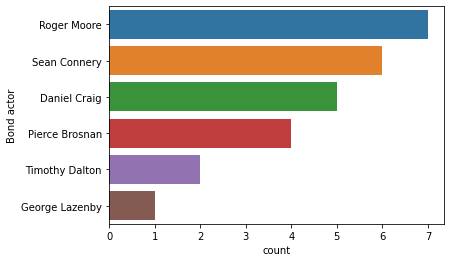

In [48]:
sns.countplot(y=df_films_songs['Bond actor'], order = df_films_songs['Bond actor'].value_counts().index)

In [49]:
df_films_songs['Bond actor'].value_counts()

Roger Moore       7
Sean Connery      6
Daniel Craig      5
Pierce Brosnan    4
Timothy Dalton    2
George Lazenby    1
Name: Bond actor, dtype: int64

In [50]:
df_films_songs.columns


Index(['Film Title', 'Year', 'Bond actor', 'Director',
       'Box office (millions) Actual $',
       'Box office (millions) Adjusted 2005 $', 'Budget (millions) Actual $',
       'Budget (millions) Adjusted 2005 $', 'Theme Song', 'Performer',
       'Composer'],
      dtype='object')

**What was the Box Office and Budget?**

In [51]:
df_num = df_films_songs.iloc[:21]
for col in ['Box office (millions) Actual $',
       'Box office (millions) Adjusted 2005 $', 'Budget (millions) Actual $',
       'Budget (millions) Adjusted 2005 $']:
    
    df_num[col] = df_num[col].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


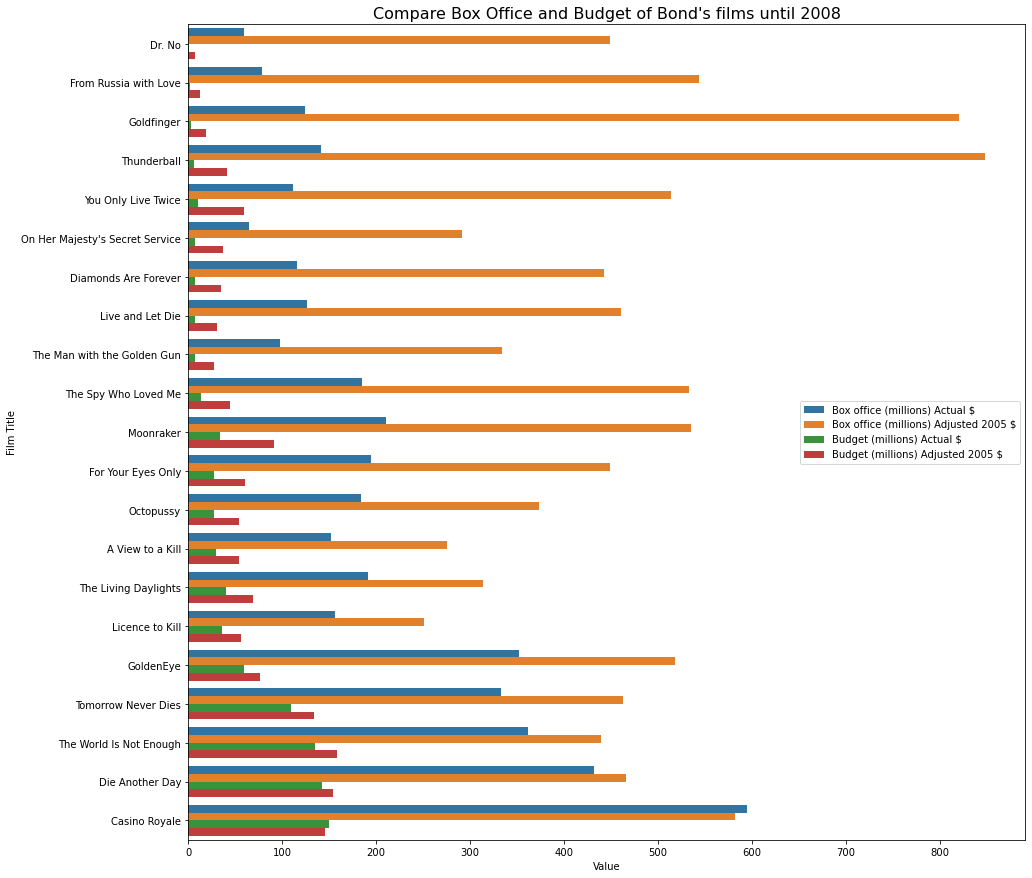

In [52]:
fig, ax1 = plt.subplots(figsize=(15, 15))
tidy = df_num.melt(id_vars='Film Title',  value_vars=['Box office (millions) Actual $',
       'Box office (millions) Adjusted 2005 $', 'Budget (millions) Actual $',
       'Budget (millions) Adjusted 2005 $']).rename(columns=str.title)
sns.barplot(y='Film Title', x='Value', hue='Variable', data=tidy, ax=ax1)
plt.title("Compare Box Office and Budget of Bond's films until 2008", size=16)
plt.legend(loc = "center right", title = "")


**Is there any performer that performed songs more than once?**

In [53]:
df_films_songs['Performer'].value_counts()[df_films_songs['Performer'].value_counts().values > 1].index[0]

'Shirley Bassey'

**Which songs and in which years she song?**

In [54]:
df_films_songs[['Theme Song','Year']][df_films_songs['Performer']=='Shirley Bassey']

,Theme Song,Year
2,Goldfinger,1964
6,Diamonds Are Forever,1971
10,Moonraker,1979


# 🎶 Web Scraping Lyrics: How to Access Information within Hyperlinks

To show how to scrape webpages within a webpage let's obtain lyrics of James Bond's theme songs.

Here we will build a dataframe with song titles, performers, and lyrics. 

In [55]:
main_url = "https://www.stlyrics.com/b/bestofbondjamesbond.htm"

In [56]:
parser = parse_website(main_url)

In [62]:
# Find all 'a' tags (which define hyperlinks): a_tags

a_tags = parser.find_all('a')

# Create a list with hyperlinks found

list_links = [link.get('href') for link in a_tags]

# Remove none values if there is some
    
list_links = list(filter(None, list_links)) 

list_links

['/',
 '/',
 '/a.htm',
 '/b.htm',
 '/c.htm',
 '/d.htm',
 '/e.htm',
 '/f.htm',
 '/g.htm',
 '/h.htm',
 '/i.htm',
 '/j.htm',
 '/k.htm',
 '/l.htm',
 '/m.htm',
 '/n.htm',
 '/o.htm',
 '/p.htm',
 '/q.htm',
 '/r.htm',
 '/s.htm',
 '/t.htm',
 '/u.htm',
 '/v.htm',
 '/w.htm',
 '/x.htm',
 '/y.htm',
 '/z.htm',
 '/19.htm',
 '/songs/',
 '/songs/a.html',
 '/songs/b.html',
 '/songs/c.html',
 '/songs/d.html',
 '/songs/e.html',
 '/songs/f.html',
 '/songs/g.html',
 '/songs/h.html',
 '/songs/i.html',
 '/songs/j.html',
 '/songs/k.html',
 '/songs/l.html',
 '/songs/m.html',
 '/songs/n.html',
 '/songs/o.html',
 '/songs/p.html',
 '/songs/q.html',
 '/songs/r.html',
 '/songs/s.html',
 '/songs/t.html',
 '/songs/u.html',
 '/songs/v.html',
 '/songs/w.html',
 '/songs/x.html',
 '/songs/y.html',
 '/songs/z.html',
 '/songs/0-9.html',
 '#',
 '#',
 '/add/lyrics_id/3546.htm',
 '/lyrics/bestofbondjamesbond/aviewtoakill.htm',
 '/lyrics/bestofbondjamesbond/alltimehigh.htm',
 '/lyrics/bestofbondjamesbond/anotherwaytodie.htm',
 

In [63]:
list_links = list(set(list_links))

print('\n Number of links before filtering:', len(list_links))
list_links[:20]


 Number of links before filtering: 109


['/lyrics/bestofbondjamesbond/liveandletdie.htm',
 '/b/becoming.htm',
 '/a.htm',
 '/songs/x.html',
 '/w.htm',
 '/lyrics/bestofbondjamesbond/youknowmyname.htm',
 '/songs/u.html',
 '#',
 '/songs/c.html',
 '/h.htm',
 '/songs/m.html',
 '/songs/o.html',
 '/songs/q.html',
 '/lyrics/bestofbondjamesbond/dieanotherday.htm',
 '/songs/p.html',
 '/songs/d.html',
 '/b/bringthesoul.htm',
 '/s/spaceshipearth.htm',
 '/e/eurovisionsongcontestthestoryoffiresaga.htm',
 '/t/thefk-itlist.htm']

In [64]:
list_links = [link for link in list_links if 'bestofbondjamesbond' in link]
print('\n Number of links after filtering:', len(list_links))
list_links


 Number of links after filtering: 23


['/lyrics/bestofbondjamesbond/liveandletdie.htm',
 '/lyrics/bestofbondjamesbond/youknowmyname.htm',
 '/lyrics/bestofbondjamesbond/dieanotherday.htm',
 '/lyrics/bestofbondjamesbond/goldeneye.htm',
 '/lyrics/bestofbondjamesbond/alltimehigh.htm',
 '/lyrics/bestofbondjamesbond/thunderball.htm',
 '/lyrics/bestofbondjamesbond/foryoureyesonly.htm',
 '/lyrics/bestofbondjamesbond/anotherwaytodie.htm',
 '/lyrics/bestofbondjamesbond/themanwiththegoldengun.htm',
 '/lyrics/bestofbondjamesbond/youonlylivetwice.htm',
 '/lyrics/bestofbondjamesbond/thelivingdaylights.htm',
 '/lyrics/bestofbondjamesbond/licencetokill.htm',
 '/lyrics/bestofbondjamesbond/nobodydoesitbetter.htm',
 '/lyrics/bestofbondjamesbond/diamondsareforever.htm',
 '/lyrics/bestofbondjamesbond/wehaveallthetimeintheworld.htm',
 '/lyrics/bestofbondjamesbond/goldfinger.htm',
 '/lyrics/bestofbondjamesbond/aviewtoakill.htm',
 '/lyrics/bestofbondjamesbond/theworldisnotenough.htm',
 '/lyrics/bestofbondjamesbond/jamesbondtheme.htm',
 '/lyrics/b

In [65]:
complete_urls = ["https://www.stlyrics.com"+link for link in list_links]
complete_urls

['https://www.stlyrics.com/lyrics/bestofbondjamesbond/liveandletdie.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/youknowmyname.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/dieanotherday.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/goldeneye.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/alltimehigh.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/thunderball.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/foryoureyesonly.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/anotherwaytodie.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/themanwiththegoldengun.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/youonlylivetwice.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/thelivingdaylights.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/licencetokill.htm',
 'https://www.stlyrics.com/lyrics/bestofbondjamesbond/nobodydoesitbetter.htm',
 'https://www.stlyri

In [66]:
url_lyric = complete_urls[0]

r_lyric = requests.get(url_lyric)
    
# obtain text with html containt of the url
html_doc_lyric = r_lyric.content
    
# making html easier to read
soup_lyric = BeautifulSoup(html_doc_lyric,"lxml")

lyric_list = soup_lyric.find_all('div', class_="highlight")
    
lyric_list=[item.text.strip() for item in lyric_list ]
    
# Remove none values if there is some
lyric_list = list(filter(None, lyric_list)) 

print('\n'.join(lyric_list))

When You Were Young And Your Heart Was An Open Book
You Used To Say Life And Let Life
(You Know You Did, You Know You Did You Know You Did)
But In This Ever Changing World In Which We Live In
Makes You Give In And Cry
Say Live And Let Die
Live And Let Die
Live And Let Die
Live And Let Die
What Does It Matter To Ya
When You Got A Job To Do
You Gotta Do It Well
You Gotta Give The Other Fellow Hell
When You Were Young And Your Heart Was An Open Book
You Used To Say Life And Let Life
(You Know You Did, You Know You Did You Know You Did)
But In This Ever Changing World In Which We Live In
Makes You Give In And Cry


In [67]:
def extract_lyric_from_url(url_lyric):
    """ 
    Extract lyrics after prettify beautiful soup from www.songteksten.nl 
    """
    
    
    # send a http request
    r_lyric = requests.get(url_lyric)
    
    # obtain text with html containt of the url
    html_doc_lyric = r_lyric.text
    
    # making html easier to read
    soup_lyric = BeautifulSoup(html_doc_lyric,"lxml")

    lyric_list = soup_lyric.find_all('div', class_="highlight")
    
    lyric_list=[item.text.strip() for item in lyric_list ]
    # Remove none values if there is some
    
    lyric_list = list(filter(None, lyric_list)) 

    return ' '.join(lyric_list)

In [68]:
list_lyrics = []
list_links = []

for link in complete_urls:
    list_lyrics.append(extract_lyric_from_url(link))
    list_links.append(link.split('/')[-1].replace('.htm',''))

In [69]:
len(list_links)

23

In [78]:
df_links = pd.DataFrame({'links':list_links, 'lyrics': list_lyrics})
df_links

,links,lyrics
0,liveandletdie,When You Were Young And Your Heart Was An Open...
1,youknowmyname,"If you take a life, do you know what you'll gi..."
2,dieanotherday,"I'm gonna wake up, yes and no I'm gonna kiss s..."
3,goldeneye,See reflections on the water more than darknes...
4,alltimehigh,All I wanted was a sweet distraction for an ho...
5,thunderball,He always runs while others walk. He acts whil...
6,foryoureyesonly,For your eyes only Can see me through the nigh...
7,anotherwaytodie,(Feat. Alicia Keys) I know the player With the...
8,themanwiththegoldengun,He has a powerful weapon He charges a million ...
9,youonlylivetwice,"You only live twice, Or so it seems. One life ..."


In [80]:
df_songs

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme / Kingston Calypso (a.k.a 'Th...,Orkest led by John Barry / Byron Lee and the D...,Dr. No,1962,Monty Norman & John Barry
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


In [81]:
df_lyrics = df_songs.copy()
df_lyrics

,Theme Song,Performer,Film Title,Year,Composer
0,James Bond Theme / Kingston Calypso (a.k.a 'Th...,Orkest led by John Barry / Byron Lee and the D...,Dr. No,1962,Monty Norman & John Barry
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse
5,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager


In [85]:
df_lyrics['links'] = df_lyrics['Theme Song'].apply(lambda x: x.lower().replace(' ','').replace("'",''))

In [93]:
df_lyrics = df_lyrics.merge(df_links, on='links', how='outer')

In [94]:
df_lyrics

,Theme Song,Performer,Film Title,Year,Composer,links,lyrics
0,James Bond Theme / Kingston Calypso (a.k.a 'Th...,Orkest led by John Barry / Byron Lee and the D...,Dr. No,1962,Monty Norman & John Barry,jamesbondtheme/kingstoncalypso(a.k.athreeblind...,NaN
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart,fromrussiawithlove,"From Russia with love I fly to you, much wiser..."
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse,goldfinger,"Goldfinger. He's the man, the man with the mid..."
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black,thunderball,He always runs while others walk. He acts whil...
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse,youonlylivetwice,"You only live twice, Or so it seems. One life ..."
5,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry,onhermajestyssecretservice,I've got a secret I can't explain And all the ...
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black,diamondsareforever,"Diamonds are forever, They are all I need to p..."
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney,liveandletdie,When You Were Young And Your Heart Was An Open...
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black,themanwiththegoldengun,He has a powerful weapon He charges a million ...
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager,nobodydoesitbetter,Nobody does it better Makes me feel sad for th...


In [95]:
df_lyrics.dropna(inplace=True)

In [96]:
df_lyrics

,Theme Song,Performer,Film Title,Year,Composer,links,lyrics
1,From Russia with Love,Matt Monro,From Russia with Love,1963,John Barry & Lionel Bart,fromrussiawithlove,"From Russia with love I fly to you, much wiser..."
2,Goldfinger,Shirley Bassey,Goldfinger,1964,John Barry & Anthony Newley & Leslie Bricusse,goldfinger,"Goldfinger. He's the man, the man with the mid..."
3,Thunderball,Tom Jones,Thunderball,1965,John Barry & Don Black,thunderball,He always runs while others walk. He acts whil...
4,You Only Live Twice,Nancy Sinatra,You Only Live Twice,1967,John Barry & Leslie Bricusse,youonlylivetwice,"You only live twice, Or so it seems. One life ..."
5,On Her Majesty's Secret Service,Orkest led by John Barry,On Her Majesty's Secret Service,1969,John Barry,onhermajestyssecretservice,I've got a secret I can't explain And all the ...
6,Diamonds Are Forever,Shirley Bassey,Diamonds Are Forever,1971,John Barry & Don Black,diamondsareforever,"Diamonds are forever, They are all I need to p..."
7,Live and Let Die,Paul McCartney & Wings,Live and Let Die,1973,Paul McCartney & Linda McCartney,liveandletdie,When You Were Young And Your Heart Was An Open...
8,The Man with the Golden Gun,Lulu,The Man with the Golden Gun,1974,John Barry & Don Black,themanwiththegoldengun,He has a powerful weapon He charges a million ...
9,Nobody Does It Better,Carly Simon,The Spy Who Loved Me,1977,Marvin Hamlisch & Carole Bayer Sager,nobodydoesitbetter,Nobody does it better Makes me feel sad for th...
10,Moonraker,Shirley Bassey,Moonraker,1979,John Barry & Hal David,moonraker,Where are you Why do you hide Where is that mo...
